# Пробуем разные приколы! 

На самой первой паре мы много говорили про Keras, высокоуровневое API для Tensorflow. Он позволяет быстро и без боли учить нейронки, в которых не встречается особо много извращений. В этой тетрадке мы окунёмся в него чуть глубже. Работать по-прежнему будем с одеждой. 

In [1]:
import numpy as np
import tensorflow as tf
tf.__version__ 

'2.1.0'

In [2]:
from tensorflow.keras import Sequential
keras, L = tf.keras, tf.keras.layers

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

X_train = X_train/ 255.
X_val = X_val/ 255.
X_test = X_test/ 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

# 1. Инициализация и батчнорм

Мы сегодня говорили о батч-нормализации и про то, как правильно в нейросетках делается инициализация весов. Давайте закрепим эти знания на практике, и переработаем их в навыки.

In [5]:
# Помните зачем эта функция? :3 
# Мы довольно активно использовали её, когда говорили про градиентные спуски

def plot_history(histories, key='loss', start=0):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch[start:], history.history['val_'+key][start:],
                       #'--', 
                       label=name.title()+' Val')
            #plt.plot(history.epoch[start:], history.history[key][start:], color=val[0].get_color(),
            #     label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([start, max(history.epoch)])
    pass

### Задание 1:

Для начала реализуйте простую нейросеть:
* принимает на вход картинки размера 28 x 28
* вытягивает их в вектор (`keras.layers.Flatten`)
* пропускает через $6$ полносвязных слоёв с сотней нейронов и вашей любимой функцией активации
* на выходе предсказывает веротятности принадлежности к каждому из 10 классов
* при обучении сетки поставьте размер батча $500$, учите сетку $20$ эпох

__Важно:__ поскольку в y_train лежат номера классов, керасу нужно либо указать sparse функции потерь и метрики (`sparse_categorical_crossentropy` и `sparse_categorical_accuracy`), либо конвертировать y в one-hot формат.

__Ещё важнее:__ при большом батче модель будет быстрее проходить эпохи. Когда он очень большой, необходимо довольно много эпох для сходимости. Градиент обновляется редко. Когда размер батча совсем маленький, сетка может обучаться довольно шумно. 

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)
# def first_model():
#     model = ...
    
#     return model


model = Sequential(name = 'first_try')
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())
model.add(L.Dense(100,  kernel_initializer='random_normal',name='First'))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer='random_normal'))
model.add(L.ReLU())
model.add(L.Dense(10, kernel_initializer = 'random_normal'))
model.add(L.Softmax())
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',
             metrics=["sparse_categorical_accuracy"])


history1 = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data = (X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 34us/sample - loss: 2.2292 - sparse_categorical_accuracy: 0.2428 - val_loss: 1.8974 - val_sparse_categorical_accuracy: 0.3848
Epoch 2/20
50000/50000 [==============================] - 1s 26us/sample - loss: 1.2612 - sparse_categorical_accuracy: 0.5261 - val_loss: 0.9720 - val_sparse_categorical_accuracy: 0.6202
Epoch 3/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.8918 - sparse_categorical_accuracy: 0.6391 - val_loss: 0.8694 - val_sparse_categorical_accuracy: 0.6514
Epoch 4/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.8312 - sparse_categorical_accuracy: 0.6670 - val_loss: 0.8319 - val_sparse_categorical_accuracy: 0.6650
Epoch 5/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.7980 - sparse_categorical_accuracy: 0.6834 - val_loss: 0.7962 - val_sparse_categorical_accuracy: 0.6846
Epoch 6/20
5000

### Задание 2:

Возьмите ту же нейросетку и в качестве инициализации используйте либо инициализацию Хе либо Глорота (в зависимости от выбранных вами функций активации). 

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)

init = 'he_uniform'
model = Sequential(name = 'first_try')
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())
model.add(L.Dense(100,  kernel_initializer=init,name='First'))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.ReLU())
model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',
             metrics=["sparse_categorical_accuracy"])


history2 = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data = (X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 42us/sample - loss: 1.4353 - sparse_categorical_accuracy: 0.5422 - val_loss: 0.7593 - val_sparse_categorical_accuracy: 0.7406
Epoch 2/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.6191 - sparse_categorical_accuracy: 0.7876 - val_loss: 0.5578 - val_sparse_categorical_accuracy: 0.8055
Epoch 3/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.5102 - sparse_categorical_accuracy: 0.8233 - val_loss: 0.4931 - val_sparse_categorical_accuracy: 0.8285
Epoch 4/20
50000/50000 [==============================] - 1s 23us/sample - loss: 0.4644 - sparse_categorical_accuracy: 0.8396 - val_loss: 0.4637 - val_sparse_categorical_accuracy: 0.8405
Epoch 5/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.4371 - sparse_categorical_accuracy: 0.8480 - val_loss: 0.4429 - val_sparse_categorical_accuracy: 0.8434
Epoch 6/20
5000

### Задание 3:

Берём ту же самую сетку и добавляем в неё батч-нормализацию после каждго слоя. Инициализацию замените назад на равномерную. 

In [30]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)


init = 'uniform'
model = Sequential(name = 'first_try')
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())
model.add(L.Dense(100,  kernel_initializer=init,name='First'))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',
             metrics=["sparse_categorical_accuracy"])


history3 = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data = (X_val,y_val))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 67us/sample - loss: 1.6134 - sparse_categorical_accuracy: 0.6459 - val_loss: 2.3019 - val_sparse_categorical_accuracy: 0.0997
Epoch 2/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.9671 - sparse_categorical_accuracy: 0.8120 - val_loss: 2.2617 - val_sparse_categorical_accuracy: 0.1691
Epoch 3/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.6994 - sparse_categorical_accuracy: 0.8523 - val_loss: 1.8038 - val_sparse_categorical_accuracy: 0.7070
Epoch 4/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.5525 - sparse_categorical_accuracy: 0.8706 - val_loss: 0.9783 - val_sparse_categorical_accuracy: 0.8501
Epoch 5/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.4650 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.5951 - val_sparse_categorical_accuracy: 0.8655
Epoch 6/20
5000

### Задание 4:

А теперь сразу и инициализация и батч-нормализация.

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)


init = 'he_uniform'
model = Sequential(name = 'first_try')
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())
model.add(L.Dense(100,  kernel_initializer=init,name='First'))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(100,  kernel_initializer=init))
model.add(L.BatchNormalization())
model.add(L.ReLU())
model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',
             metrics=["sparse_categorical_accuracy"])


history4 = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data = (X_val,y_val),verbose=0)


### Задание 5:

Дело осталось за малым. Нарисовать траектории обучения всех сеток на одной картинке и сравнить их между собой.

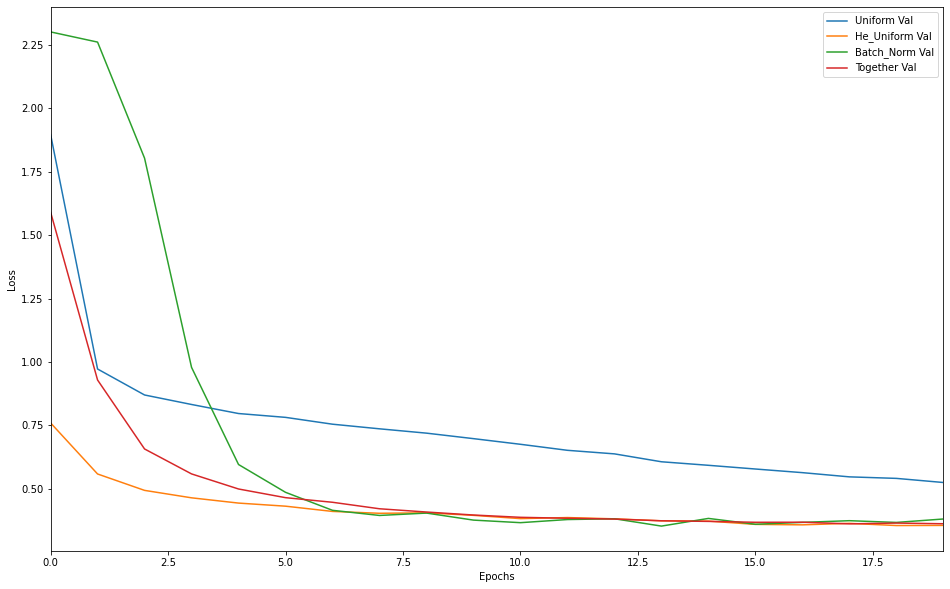

In [32]:
plot_history([('uniform',    history1), 
              ('he_uniform', history2),
              ('batch_norm', history3),
              ('together',   history4)
             ],
             start=0)

## 2. Функции активации  

### Задание 6:

Давайте попробуем поймать эффект, когда у нашей нейронки наступает паралич. Возьмите самый первый вариант нейросетки и замените все функции активации на сигмоиды. 



In [33]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)

init = 'uniform'
act = 'sigmoid'






model = Sequential(name = 'first_try')
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())
model.add(L.Dense(100,  kernel_initializer=init,name='First',activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',
             metrics=["sparse_categorical_accuracy"])


history5 = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data = (X_val,y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 38us/sample - loss: 2.3039 - sparse_categorical_accuracy: 0.0982 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.0947
Epoch 2/20
50000/50000 [==============================] - 1s 22us/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0998 - val_loss: 2.3026 - val_sparse_categorical_accuracy: 0.1001
Epoch 3/20
50000/50000 [==============================] - 1s 23us/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0995 - val_loss: 2.3031 - val_sparse_categorical_accuracy: 0.0947
Epoch 4/20
50000/50000 [==============================] - 1s 25us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0974 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.0947
Epoch 5/20
50000/50000 [==============================] - 1s 22us/sample - loss: 2.3028 - sparse_categorical_accuracy: 0.0997 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.1008
Epoch 6/20
5000

### Задание 7:  

Теперь попробуем взять вместо сигмоид elu

In [34]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)

init = 'uniform'
act = 'elu' # в таком варианте alpha = 1 
            # если хочется его подергать: L.ELU(alpha=1.0)
    
    
model = Sequential(name = 'first_try')
model.add(L.InputLayer(input_shape = (28,28)))
model.add(L.Flatten())
model.add(L.Dense(100,  kernel_initializer=init,name='First',activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(100,  kernel_initializer=init,activation=act))
model.add(L.Dense(10, kernel_initializer = init))
model.add(L.Softmax())
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',
             metrics=["sparse_categorical_accuracy"])


history6 = model.fit(X_train,y_train,batch_size=500,epochs=20,validation_data = (X_val,y_val),verbose=0)

### Задание 8:

Снова сравниваем модели между собой.

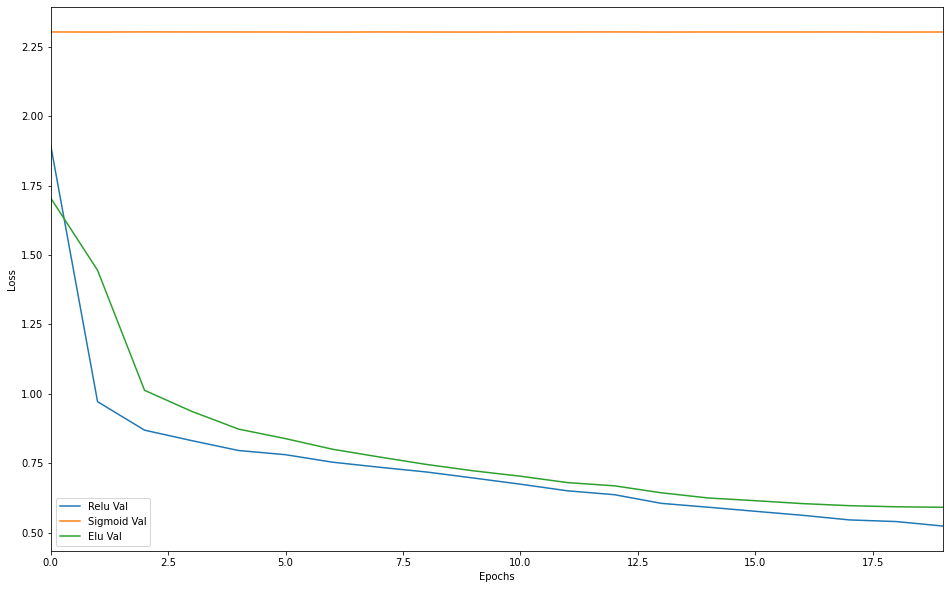

In [35]:
plot_history([('relu',   history1), 
              ('sigmoid', history5),
              ('elu',   history6),
             ],
             start=0)

# 3. Keras бывет разным, про skip-connection

На первой паре мы с вами говорили, что в Keras задавать модели можно по-разному. Второй способ делать это: функциональный стиль. Он даёт на порядок больше возможностей. Давайте посмотрим как это выглядит и попробуем собрать пару моделей. 

In [39]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

In [40]:
model.compile("adam", loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=1, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
50000/50000 [==============================] - 2s 35us/sample - loss: 1.5006 - sparse_categorical_accuracy: 0.3668 - val_loss: 1.0213 - val_sparse_categorical_accuracy: 0.5359


Помните статью про то, как люди рисовали функции потерь? [Теперь появилась галерея!](https://losslandscape.com/gallery/) На паре про градиентный спуск мы говорили, что skip-connection довольно здорово меняет ландшафт функции потерь. 

![](https://i.stack.imgur.com/UDvbg.png)

Такую модель нельзя собрать через `Sequence`-стиль, но можно через функциональный стиль. Давайте попробуем сделать это. Заодно посмотрим насколько сильно в нашей ситуации будет меняться траектория обучения. 

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  создайте сеть по инструкции выше
tf.random.set_seed(42)

init = 'he_uniform'
act = 'elu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x = L.concatenate([x, x1])

x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x, x1])

x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
x = L.concatenate([x, x1])

output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor)

model.compile("adam", loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

history7 = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                     epochs=20, batch_size=500, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 43us/sample - loss: 0.6470 - sparse_categorical_accuracy: 0.7647 - val_loss: 0.4596 - val_sparse_categorical_accuracy: 0.8359
Epoch 2/20
50000/50000 [==============================] - 1s 26us/sample - loss: 0.4176 - sparse_categorical_accuracy: 0.8501 - val_loss: 0.4135 - val_sparse_categorical_accuracy: 0.8481
Epoch 3/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.3759 - sparse_categorical_accuracy: 0.8656 - val_loss: 0.3851 - val_sparse_categorical_accuracy: 0.8592
Epoch 4/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.3489 - sparse_categorical_accuracy: 0.8738 - val_loss: 0.3563 - val_sparse_categorical_accuracy: 0.8689
Epoch 5/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.3313 - sparse_categorical_accuracy: 0.8781 - val_loss: 0.3576 - val_sparse_categorical_accuracy: 0.8715
Epoch 6/20
5000

In [43]:
from tensorflow.keras.utils import plot_model

In [45]:
# нужно для винды, если не видит путь до graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

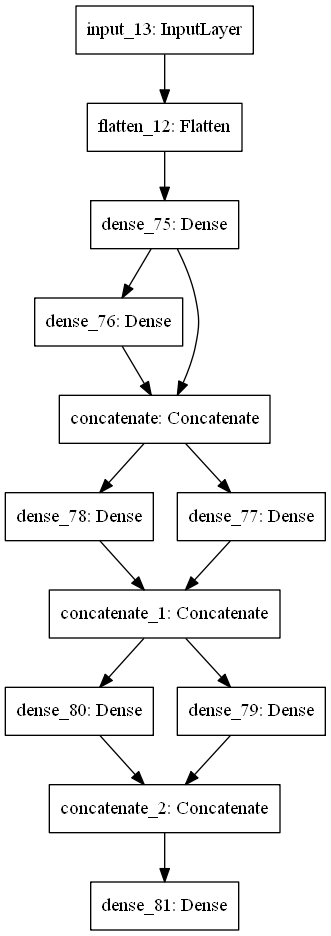

In [46]:
plot_model(model)

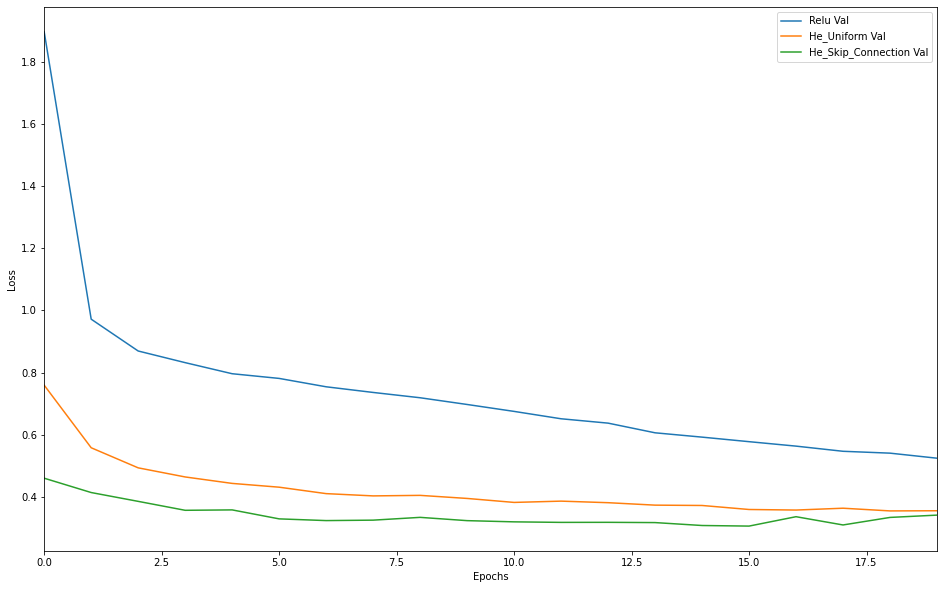

In [42]:
plot_history([('relu', history1), 
              ('he_uniform', history2),
              ('he_skip_connection', history7)
             ],
             start=0)

# 4. Ещё немного функционального API 


## 4.1 Несколько входов

В этом примере на вход идёт две картинки.

In [47]:
input_1 = L.Input(shape=(28, 28))
input_2 = L.Input(shape=(28, 28))

x1 = L.Flatten()(input_1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)

x2 = L.Flatten()(input_2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)

x = L.concatenate([x1, x2])
output = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model([input_1, input_2], output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_13 (Flatten)            (None, 784)          0           input_14[0][0]                   
__________________________________________________________________________________________________
flatten_14 (Flatten)            (None, 784)          0           input_15[0][0]                   
____________________________________________________________________________________________

Немного бессмысленный пример обучения, когда на вход идут две одинаковые картиночки.

In [48]:
model.compile("adam", loss="sparse_categorical_crossentropy", 
              metrics=["sparse_categorical_accuracy"])

model.fit([X_train, X_train], y_train, validation_data=([X_val, X_val], y_val),
          epochs=2, batch_size=500)

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 2s 45us/sample - loss: 0.6179 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.4678 - val_sparse_categorical_accuracy: 0.8320
Epoch 2/2
50000/50000 [==============================] - 2s 34us/sample - loss: 0.4324 - sparse_categorical_accuracy: 0.8458 - val_loss: 0.4235 - val_sparse_categorical_accuracy: 0.8469


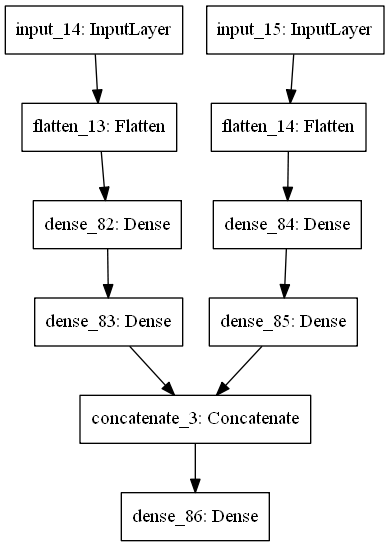

In [49]:
plot_model(model)

## 4.2 Несколько выходов и функций потерь

In [ ]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x)

output_1 = L.Dense(10, kernel_initializer=init, activation='softmax')(x1)
output_2 = L.Dense(10, kernel_initializer=init, activation='softmax')(x2)
output_3 = L.Dense(10, kernel_initializer=init, activation='softmax')(x3)

model = keras.Model(input_tensor, [output_1, output_2, output_3])

model.summary()

In [ ]:
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy',
                                      'sparse_categorical_crossentropy', 
                                      'sparse_categorical_crossentropy'],
                                    loss_weights=[0.25, 1., 10.])

model.fit(X_train, [y_train, y_train, y_train], epochs=2, batch_size=500)

Пример с разными функциями потерь:

### Дополнительное задание  :

Мы говорили, что если мы используем BN, то нужно уменьшить силу Dropout. Поэтому попробуйте сравнить Dropout + BN c разным p.

---